In [9]:
import h5py
import numpy as np
import requests
import getpass
import socket
import json
import zipfile
import io
import math
from glob import glob
import os
import shutil
import pprint
import time
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# To read KML files with geopandas, we will need to enable KML support in fiona (disabled by default)
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
from shapely.geometry import Polygon, mapping
from shapely.geometry.polygon import orient
from statistics import mean
from requests.auth import HTTPBasicAuth


In [14]:
# View data file information
!h5ls -r '/home/jovyan/ATL03/ATL03_20190102184312_00810210_001_01.h5'

/                        Group
/METADATA                Group
/METADATA/AcquisitionInformation Group
/METADATA/AcquisitionInformation/lidar Group
/METADATA/AcquisitionInformation/lidarDocument Group
/METADATA/AcquisitionInformation/platform Group
/METADATA/AcquisitionInformation/platformDocument Group
/METADATA/DataQuality    Group
/METADATA/DataQuality/CompletenessOmission Group
/METADATA/DataQuality/DomainConsistency Group
/METADATA/DatasetIdentification Group
/METADATA/Extent         Group
/METADATA/Lineage        Group
/METADATA/Lineage/ANC01  Group
/METADATA/Lineage/ANC03  Group
/METADATA/Lineage/ANC04  Group
/METADATA/Lineage/ANC05  Group
/METADATA/Lineage/ANC07  Group
/METADATA/Lineage/ANC08  Group
/METADATA/Lineage/ANC11  Group
/METADATA/Lineage/ANC12-01 Group
/METADATA/Lineage/ANC12-02 Group
/METADATA/Lineage/ANC19  Group
/METADATA/Lineage/ANC22  Group
/METADATA/Lineage/ANC23  Group
/METADATA/Lineage/ANC25-03 Group
/METADATA/Lineage/ANC26-03 Group
/METADATA/Lineage/ANC29  Grou

Note that the 'gtxx' folders contain "bckgrd_atlas' and 'heights' as branches, which contain background counts and geolocated photon information, respectively.

In [16]:
# Grabbing the data, sticking to the center strong laser
with h5py.File('/home/jovyan/ATL03/ATL03_20190102184312_00810210_001_01.h5') as f:
    elev_atl03 = f['/gt2l/heights/h_ph'][:]
    lat_atl03 = f['/gt2l/heights/lat_ph'][:]
    ph_class = f['/gt2l/heights/signal_conf_ph'][:]
    
with h5py.File('/home/jovyan/ATL06/ATL06_20190102184312_00810210_001_01.h5') as f:
    elev_atl06 = f['/gt2l/land_ice_segments/h_li'][:]
    lat_atl06 = f['/gt2l/land_ice_segments/latitude'][:]
    
elev_atl03[ph_class[:,3] != 4] = np.nan
elev_atl06[elev_atl06 > 10000] = np.nan


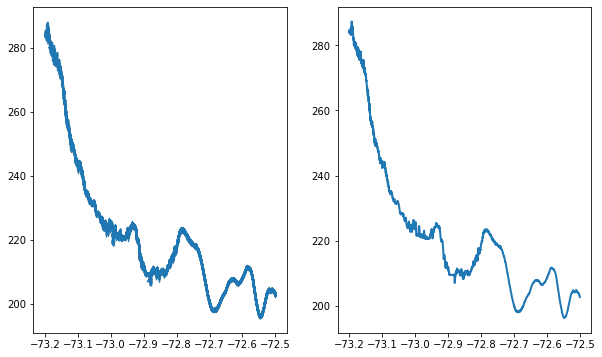

In [34]:
# Plotting
subset1 = ( (lat_atl03>=-73.2) & (lat_atl03<=-72.5))
subset2 = ( (lat_atl06 >= -73.2) & (lat_atl06 <= -72.5) )

%matplotlib inline
f1,ax = plt.subplots(1, 2,figsize=(10,6))

ax[0].plot(lat_atl03[subset1], elev_atl03[subset1], '.', markersize=0.1)
ax[1].plot(lat_atl06[subset2],elev_atl06[subset2], linewidth=2)
plt.show()

The above plots show how ATL03 and ATL06 compare if using the 